# BondOrder
## Computing Bond Order Diagrams
The `freud.environment` module analyzes the local environments of particles. In this example, the `freud.environment.BondOrder` class is used to plot the bond order diagram (BOD) of a system of particles.

In [1]:
import numpy as np
import freud
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

### Setup
Our sample data will be taken from an face-centered cubic (FCC) structure. The array of points is rather large, so that the plots are smooth. Smaller systems may need to gather data from multiple frames in order to smooth the resulting array's statistics, by computing multiple times with `reset=False`.

In [2]:
uc = freud.data.UnitCell.fcc()
box, points = uc.generate_system(40, sigma_noise=0.05)

Now we create a `BondOrder` compute object and create some arrays useful for plotting.

In [3]:
n_bins_theta = 100
n_bins_phi = 100
bod = freud.environment.BondOrder((n_bins_theta, n_bins_phi))

phi = np.linspace(0, np.pi, n_bins_phi)
theta = np.linspace(0, 2*np.pi, n_bins_theta)
phi, theta = np.meshgrid(phi, theta)
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

### Computing the Bond Order Diagram
Next, we use the `compute` method and the `bond_order` property to return the array. Note that we use `freud`'s *method chaining* here, where a compute method returns the compute object.

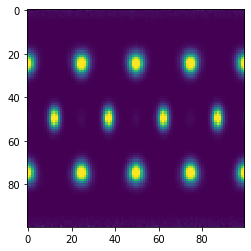

In [4]:
bod_array = bod.compute((box, points), neighbors={'num_neighbors': 12}).bond_order
# Clean up polar bins for plotting
bod_array = np.clip(bod_array, 0, np.percentile(bod_array, 99))
plt.imshow(bod_array.T)
plt.show()

### Plotting on a sphere
This code shows the bond order diagram on a sphere as the sphere is rotated. The code takes a few seconds to run, so be patient.

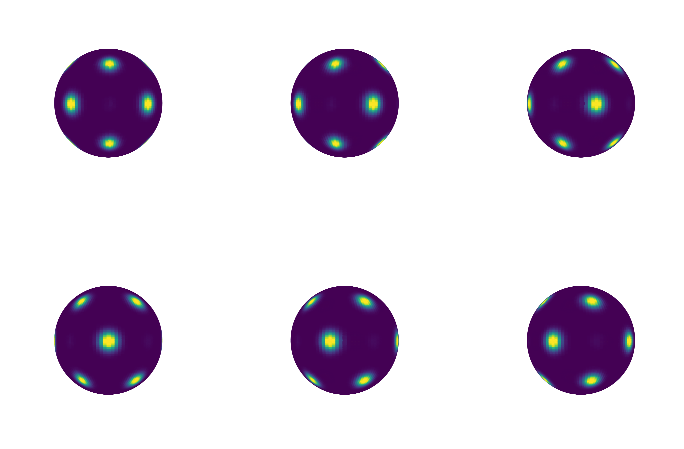

In [5]:
fig = plt.figure(figsize=(12, 8))
for plot_num in range(6):
    ax = fig.add_subplot(231 + plot_num, projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, shade=False,
                    facecolors=matplotlib.cm.viridis(bod_array / np.max(bod_array)))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_axis_off()
    # View angles in degrees
    view_angle = 0, plot_num*15
    ax.view_init(*view_angle)
plt.show()

### Using Custom Neighbors
We can also use a custom neighbor query to determine bonds. For example, we can filter for a range of bond lengths. Below, we only consider neighbors between $r_{min} = 2.5$ and $r_{max} = 3$ and plot the resulting bond order diagram.

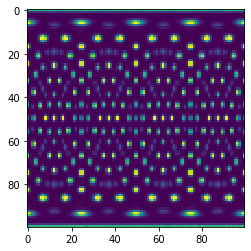

In [6]:
bod_array = bod.compute((box, points), neighbors={'r_max': 3.0, 'r_min': 2.5}).bond_order
# Clean up polar bins for plotting
bod_array = np.clip(bod_array, 0, np.percentile(bod_array, 99))
plt.imshow(bod_array.T)
plt.show()